In [7]:
from IPython.display import HTML, display
display(HTML("<style>{}</style>".format(open("../style.css").read())))

<a id="sumario"></a>

<hr>
<p class='justified'>
<p style="font-size: 25px; margin-left: 25px;"><b>Sumário</b></p>

<ol class="sub-item">
    <li class="sub-item"><a href="#importando_pacotes">Importando pacotes</a></li>
    <li class="sub-item"><a href="#carregando-os-dados">Carregando os dados</a></li>
    <li class="sub-item"><a href="#abrindo-arquivos-de-texto-em-python">Abrindo arquivos de texto em python</a></li>
    <li class="sub-item"><a href="#limpando-o-texto-para-as-analises">Limpando o texto para as análises</a></li>
    <li class="sub-item"><a href="#lei-de-zipf">Lei de Zipf</a></li>
    <li class="sub-item"><a href="#lei-de-heaps">Lei de Heaps</a></li>
    <li class="sub-item"><a href="#referencias">Referências</a></li>
</ol>
</p>
<hr>

<a href="#sumario">Sumário</a>

---
<a id="importando_pacotes"></a>
# Importando pacotes

In [216]:
from gutenberg_cleaner import *
import glob
import re
from collections import Counter
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [257]:
# ajustando algumas configurações para melhor visualização dos gráficos
plt.rcParams['font.size'] = 16                           # altera o tamanho das fontes na figura
plt.rcParams['figure.figsize'] = 8, 6                    # altera o tamanho da figura
plt.rcParams['axes.axisbelow'] = True 
plt.rcParams['lines.linewidth'] = 3                      # altera a espessura da linha
# para desenhar os grids atrás das curvas e pontos
for axis in ['xtick', 'ytick']:                          # loop para aplicar as mudanças nos eixos x e y
    plt.rcParams['{}.major.size'.format(axis)] = 10      # altera o tamanho dos ticks maiores
    plt.rcParams['{}.minor.size'.format(axis)] = 5       # altera o tamanho dos ticks menores
    plt.rcParams['{}.minor.visible'.format(axis)] = True # faz os ticks menores ficarem visíveis

<a href="#sumario">Sumário</a>

---
<a id="carregando-os-dados"></a>
# Carregando os dados

<p class="justified">
    Os livros com os quais iremos trabalhar são encontrados no site do <a href="#ref-1"><em>Gutenberg Project</em> [1]</a>. Como descrito na página principal do site, tal projeto constituí uma biblioteca de mais de 60.000 livros virtuais, os quais podem ser obtidos gratuitamente. Os livros disponíveis são em trabalhos mais antigos, os quais já tiveram seus direitos autorais expirados. 
</p>

<figure align="center">
    <img class="aw" src="../figures/gutenberg-main-page.png" alt="Gutenberg Project main page.">
    <figcaption><b>Fig. 1</b> Página principal do projeto Gutenberg.</figcaption>
</figure>

<p class="justified">
    Os dados com que iremos trabalhar consistem em livros obtidos desse site de maneira gratuita. Os textos obtidos em formato <mark class="mono_gray">.txt</mark> possuem diversas informações além do texto em si: títulos, cabeçalhos de capítulos e comentários do projeto etc. Tais informações não são pertinentes durante nossas análises e serão removidas posteriormente.
</p>

<p class="justified">
    Nessa seção iremos apenas criar uma lista com os títulos que analisaremos. Para isso, iremos listar todos os arquivos que se encontram na pasta <mark class="mono_gray">../dados/livros</mark>. Podemos fazer isso facilmente usando a função <mark class="mono_gray">glob()</mark> do pacote <mark class="mono_gray">glob</mark>:
</p>

In [425]:
lista_de_livros = glob.glob('../dados/livros/*')
lista_de_livros

['../dados/livros/alices_adventures_in_wonderland.txt',
 '../dados/livros/study_in_scarlet.txt',
 '../dados/livros/sherlock_holmes.txt',
 '../dados/livros/moby_dick.txt',
 '../dados/livros/ulysses.txt',
 '../dados/livros/dorian_gray.txt',
 '../dados/livros/pride_and_prejudice.txt',
 '../dados/livros/count_of_monte_cristo.txt',
 '../dados/livros/odyssey.txt',
 '../dados/livros/dracula.txt',
 '../dados/livros/frankenstein.txt',
 '../dados/livros/brothers_karamazov.txt']

<a href="#sumario">Sumário</a>

---
<a id="abrindo-arquivos-de-texto-em-python"></a>
# Abrindo arquivos de texto em python

<p class="justified">
    Para expor algumas propriedade quantitativas que podemos extrair de textos, iremos usar os arquivos que se encontram em <mark class="mono_gray">../dados/livros</mark>. Esses títulos foram obtidos na seção dos livros mais baixados do <em>Gutenberg Project</em> no dia 06/08/2020.
</p>

<p class="justified">
    Para ler um arquivo de texto usando python, usamos a seguinte sintaxe:
</p>

```python
    with open('file_name', 'r') as file:
        conteudo_do_arquivo = file.read()
```

<p class="justified">
    Vamos mostrar o que fica atribuído à variável <mark class="mono_gray">conteudo_do_arquivo</mark> usando um dos livros na pasta mencionada anteriormente.
</p>

In [51]:
with open('../dados/livros/sherlock_holmes.txt', "r") as f:
    texto = f.read()
    
print(texto)


Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Adventures of Sherlock Holmes

Author: Arthur Conan Doyle

Release Date: November 29, 2002 [EBook #1661]
Last Updated: May 20, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***



Produced by an anonymous Project Gutenberg volunteer and Jose Menendez



cover



The Adventures of Sherlock Holmes



by Arthur Conan Doyle



Contents


   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue C

<a href="#sumario">Sumário</a>

---
<a id="limpando-o-texto-para-as-analises"></a>
# Limpando o texto para as análises

<p class="justified">
    Observe que o texto possui diversas coisas que não fazem parte do livro. Para eliminar um pouco dessas informações desnecessárias, vamos usar a função <mark class="mono_gray">super_cleaner()</mark> do pacote <mark class="mono_gray">gutenberg_cleaner</mark>:
</p>

In [86]:
texto_sem_cabecalhos = super_cleaner(texto)
print(texto_sem_cabecalhos)

[deleted]

[deleted]

[deleted]

The Adventures of Sherlock Holmes

[deleted]

[deleted]

[deleted]

[deleted]

[deleted]

[deleted]

[deleted]

[deleted]

To Sherlock Holmes she is always _the_ woman. I have seldom heard him
mention her under any other name. In his eyes she eclipses and
predominates the whole of her sex. It was not that he felt any emotion
akin to love for Irene Adler. All emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanced mind. He
was, I take it, the most perfect reasoning and observing machine that
the world has seen, but as a lover he would have placed himself in a
false position. He never spoke of the softer passions, save with a gibe
and a sneer. They were admirable things for the observer—excellent for
drawing the veil from men’s motives and actions. But for the trained
reasoner to admit such intrusions into his own delicate and finely
adjusted temperament was to introduce a distracting factor which might
throw a doub

<p class="justified">
    Podemos melhorar nossos resultados eliminando as aparições <mark class="mono_gray">[deleted]</mark> que a função <mark class="mono_gray">super_cleaner()</mark> coloca nos trechos que foram removidos. Para isso, substituímos essas ocorrências usando o método <mark class="mono_gray">replace()</mark>:
</p>

In [87]:
texto_sem_deleted = texto_sem_cabecalhos.replace('[deleted]', '')
print(texto_sem_deleted)







The Adventures of Sherlock Holmes

















To Sherlock Holmes she is always _the_ woman. I have seldom heard him
mention her under any other name. In his eyes she eclipses and
predominates the whole of her sex. It was not that he felt any emotion
akin to love for Irene Adler. All emotions, and that one particularly,
were abhorrent to his cold, precise but admirably balanced mind. He
was, I take it, the most perfect reasoning and observing machine that
the world has seen, but as a lover he would have placed himself in a
false position. He never spoke of the softer passions, save with a gibe
and a sneer. They were admirable things for the observer—excellent for
drawing the veil from men’s motives and actions. But for the trained
reasoner to admit such intrusions into his own delicate and finely
adjusted temperament was to introduce a distracting factor which might
throw a doubt upon all his mental results. Grit in a sensitive
instrument, or a crack in one of his own high-po

<p class="justified">
    Agora temos espaços em branco que precisam ser eliminados. Para isso, separamos nosso texto toda vez que uma quebra de linha é encontrada, ou seja, <mark class="mono_gray">\n</mark>. Para fazer isso, usamos o método <mark class="mono_gray">split()</mark> fornecendo como argumento onde queremos que o texto seja dividido:
</p>

In [88]:
linhas_do_texto = texto_sem_deleted.split('\n')
linhas_do_texto

['',
 '',
 '',
 '',
 '',
 '',
 'The Adventures of Sherlock Holmes',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'To Sherlock Holmes she is always _the_ woman. I have seldom heard him',
 'mention her under any other name. In his eyes she eclipses and',
 'predominates the whole of her sex. It was not that he felt any emotion',
 'akin to love for Irene Adler. All emotions, and that one particularly,',
 'were abhorrent to his cold, precise but admirably balanced mind. He',
 'was, I take it, the most perfect reasoning and observing machine that',
 'the world has seen, but as a lover he would have placed himself in a',
 'false position. He never spoke of the softer passions, save with a gibe',
 'and a sneer. They were admirable things for the observer—excellent for',
 'drawing the veil from men’s motives and actions. But for the trained',
 'reasoner to admit such intrusions into his own delicate and finely',
 'adjusted temperament was to introduce a 

<p class="justified">
    Agora, selecionamos todas as linhas que contenham texto, isto é, todos os termos da variável <mark class="mono_gray">linhas_do_texto</mark> que sejam diferentes de <mark class="mono_gray">''</mark>:
</p>

In [89]:
lista_de_sentencas = [linha for linha in linhas_do_texto if linha != '']
lista_de_sentencas

['The Adventures of Sherlock Holmes',
 'To Sherlock Holmes she is always _the_ woman. I have seldom heard him',
 'mention her under any other name. In his eyes she eclipses and',
 'predominates the whole of her sex. It was not that he felt any emotion',
 'akin to love for Irene Adler. All emotions, and that one particularly,',
 'were abhorrent to his cold, precise but admirably balanced mind. He',
 'was, I take it, the most perfect reasoning and observing machine that',
 'the world has seen, but as a lover he would have placed himself in a',
 'false position. He never spoke of the softer passions, save with a gibe',
 'and a sneer. They were admirable things for the observer—excellent for',
 'drawing the veil from men’s motives and actions. But for the trained',
 'reasoner to admit such intrusions into his own delicate and finely',
 'adjusted temperament was to introduce a distracting factor which might',
 'throw a doubt upon all his mental results. Grit in a sensitive',
 'instrument, o

<p class="justified">
    E finlamente juntamos cada entrada dessa lista de sentenças por meio de um espaço. Para realizar isso, usamos o método <mark class="mono_gray">join()</mark>, que é aplicado em uma <mark class="mono_gray">string</mark> e recebe como parâmetro a lista com elementos que serão unidos pela string no qual o método foi aplicado. Aplicando esse método no nosso caso, teremos:
</p>

In [111]:
texto_limpo = " ".join(lista_de_sentencas)
print(texto_limpo)

The Adventures of Sherlock Holmes To Sherlock Holmes she is always _the_ woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer—excellent for drawing the veil from men’s motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not b

<p class="justified">
    Contudo, ao invés de ficarmos aplicando todas essas etapas em cada um dos textos, simplesmente criamos uma função para isso:
</p>

In [115]:
def limpando_texto(file_path):
    """
    Recebe um arquivo de texto (.txt) do Gutenberg Project
    e retorna o texto limpo, i.e., sem cabeçalhos, informações
    sobre o projeto etc.
    
    Parâmetros:
    file_path - str: caminho para o arquivo com o texto que
    deseja ser limpado.
    
    Retorno:
    Texto limpo.
    """
    
    # leitura do arquivo
    with open(file_path, 'r') as file:
        texto = file.read()
    
    # usamos a função `super_cleaner` para limpar cabeçalhos do texto
    texto_sem_cabecalhos = super_cleaner(texto)
    # substituimos as ocorrências `[deleted]`
    texto_sem_deleted = texto_sem_cabecalhos.replace('[deleted]', '')
    # separamos o texto em todas as quebras de linha `\n`
    linhas_do_texto = texto_sem_deleted.split('\n')
    # selecionamos as sentenças não vazias
    lista_de_sentencas = [linha for linha in linhas_do_texto if linha != '']
    # juntamos as sentenças não vazias com `" "`
    texto_limpo = " ".join(lista_de_sentencas)
    # retornamos o texto limpo
    return texto_limpo

<p class="justified">
    Dessa forma, o texto pode ser limpo em apenas uma linha:
</p>

In [116]:
limpando_texto('../dados/livros/sherlock_holmes.txt')

'The Adventures of Sherlock Holmes To Sherlock Holmes she is always _the_ woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer—excellent for drawing the veil from men’s motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not 

<p class="justified">
    Para podermos começar a fazer nossas análises, devemos ainda realizar mais alguns pequenos ajustes no texto. Observer que, em python, caracters maiúsculos e minúsculos fazerm a diferença:
</p>

In [102]:
'String' == 'string'

False

<p class="justified">
    Como as propriedades que analisaremos dependem estritamente da repetição das palavras dentro do texto, devemos normalizá-las, fazendo todas ficarem no mesmo padrão. É de costume que todas sejam transformadas para a forma em que todas as letras sejam minúsculas. Para que isso seja feito, basta aplicarmos o método <mark class="mono_gray">lower()</mark>:
</p>

In [117]:
limpando_texto('../dados/livros/sherlock_holmes.txt').lower()

'the adventures of sherlock holmes to sherlock holmes she is always _the_ woman. i have seldom heard him mention her under any other name. in his eyes she eclipses and predominates the whole of her sex. it was not that he felt any emotion akin to love for irene adler. all emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. he was, i take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. he never spoke of the softer passions, save with a gibe and a sneer. they were admirable things for the observer—excellent for drawing the veil from men’s motives and actions. but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not 

<p class="justified">
    Um último cuidado que devemos tomar são com caractéres de pontuação, como pontos final <mark class="mono_gray">.</mark>, de exclamação <mark class="mono_gray">!</mark>, de interrogação <mark class="mono_gray">?</mark>, vírgula <mark class="mono_gray">,</mark> etc. Devemos fazer isso, pois existe uma influência desses caracteres na contagem das palavras:
</p>

In [104]:
'string' == 'string.'

False

<p class="justified">
    Para remover todos os caracteres indesejados, usaremos a função <mark class="mono_gray">sub()</mark> do pacote <mark class="mono_gray">re</mark>. O primeiro argumento dessa função irá conter uma string com todos os caracteres que queremos remover de nosso texto, o segundo é o caracter que deve ser substituído em caso um dos caracteres da não desejados for encontrado, e o terceiro é o texto no qual queremos que a transformação seja aplicada. Vamos ver um exemplo:
</p>

In [107]:
test_str = """Essa é uma string com "pontos". E, 'temos' víruglas __também__. *Entendeu?! @#$%&*"""

caracteres_para_remover = ".,:;!?@#$%*&\'\"_"
pattern = f"[{caracteres_para_remover}]"


test_str_limpa = re.sub(pattern, '', test_str)
print(test_str)
print(test_str_limpa)
print(test_str_limpa.lower())

Essa é uma string com "pontos". E, 'temos' víruglas __também__. *Entendeu?! @#$%&*
Essa é uma string com pontos E temos víruglas também Entendeu 
essa é uma string com pontos e temos víruglas também entendeu 


<p class="justified">
    Queremos deixar nosso texto como na última linha mostrada na célula anterior. Assim:
</p>

In [123]:
caracteres_para_remover = "!@#$%*()_+-=\\|<>,.;/:?~“”‘’—\'\""
pattern = f"[{caracteres_para_remover}]"

texto_para_analise = re.sub(pattern, '', limpando_texto('../dados/livros/sherlock_holmes.txt').lower())
print(texto_para_analise)

the adventures of sherlock holmes to sherlock holmes she is always the woman i have seldom heard him mention her under any other name in his eyes she eclipses and predominates the whole of her sex it was not that he felt any emotion akin to love for irene adler all emotions and that one particularly were abhorrent to his cold precise but admirably balanced mind he was i take it the most perfect reasoning and observing machine that the world has seen but as a lover he would have placed himself in a false position he never spoke of the softer passions save with a gibe and a sneer they were admirable things for the observerexcellent for drawing the veil from mens motives and actions but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results grit in a sensitive instrument or a crack in one of his own highpower lenses would not be more disturbing than 

<p class="justified">
    Podemos então reformular nossa função para encorporar essas etapas:
</p>

In [124]:
def limpando_texto(file_path):
    """
    Recebe um arquivo de texto (.txt) do Gutenberg Project
    e retorna o texto limpo, i.e., sem cabeçalhos, informações
    sobre o projeto etc.
    
    Parâmetros:
    file_path - str: caminho para o arquivo com o texto que
    deseja ser limpado.
    
    Retorno:
    Texto limpo.
    """
    
    # leitura do arquivo
    with open(file_path, 'r') as file:
        texto = file.read()
    
    # usamos a função `super_cleaner` para limpar cabeçalhos do texto
    texto_sem_cabecalhos = super_cleaner(texto)
    # substituimos as ocorrências `[deleted]`
    texto_sem_deleted = texto_sem_cabecalhos.replace('[deleted]', '')
    # separamos o texto em todas as quebras de linha `\n`
    linhas_do_texto = texto_sem_deleted.split('\n')
    # selecionamos as sentenças não vazias
    lista_de_sentencas = [linha for linha in linhas_do_texto if linha != '']
    # juntamos as sentenças não vazias com `" "`
    texto_limpo = " ".join(lista_de_sentencas)
    
    # texto todo minúsculo
    text_minusculo = texto_limpo.lower()
    # lista de caracteres para serem removidos
    caracteres_para_remover = "!@#$%*()_+-=\\|<>,.;/:?~“”‘’—\'\""
    # padrão para ser usado na função re.sub()
    pattern = f"[{caracteres_para_remover}]"
    # removendo os caracteres indesejados
    texto_para_analise = re.sub(pattern, '', text_minusculo)
    
    # retornando o texto pronto para as análises
    return texto_para_analise

<p class="justified">
    Com essa função podemos simplesmente colocar o caminho do texto que queremos limpar e o trabalho de várias etapas será realizado rapidamente em apenas uma linha de código. Nas próximas seções veremos como usar esse texto para observarmos alguns comportamentos quantitativos em textos que são universais, como as leis de Zipf e Heaps.
</p>

<a href="#sumario">Sumário</a>

---
<a id="lei-de-zipf"></a>
# Lei de Zipf

<p class="justified">
    A lei de Zipf, a mais famosa em linguística quantitativa, afirma que para um dado sistema com diversos componentes a distribuição de suas frequências, isto é, o número de vezes que se repetem no conjunto, segue uma lei de potência inversa com seus <i>rankings</i>. Por exemplo, dado um texto, ela afirma quea frequência $f$ da $r$-ésima palavra mais frequente é inversamente proporcional ao seu <i>ranking</i>
</p>

$$
    f(r) = \frac{f(1)}{r} \sim \frac{1}{r}
$$

<p class="justified">
    em que $f(1)$ é a frequência da palavra de <i>ranking</i> número 1 ($r = 1$), isto é, aquela que mais se repete ao longo de todo o texto <a href="#ref-2">[2]</a>.
</p>

<p class="justified">
    Essa lei tem sido aplicada em diferentes aspectos dentro e fora da análise textual. Recentemente verificou-se que os tons dos \textit{pixels} em uma pintura seguem esse tipo de distribuição <a href="#ref-3">[3]</a> e que áudios de transmissões de propagandas se equiparam a seus textos, seguindo a lei de Zipf <a href="#ref-4">[4]</a>. Essa lei também aparece em outros tipos de estudos envolvendo dados de incêndios florestais <a href="#ref-5">[5]</a>, tamanhos de empresas <a href="ref-6">[6]</a> e as propriedades linguísticas de DNA não codificado <a href="#ref-7">[7]</a>. Em textos também é comum verificá-la no mapeamento de textos em séries temporais, onde se leva em consideração a frequência de distribuição do tamanho de frases, levando em consideração o número de letras, de acordo com seu \textit{ranking} <a href="#ref-8">[8]</a>.
</p>

<p class="justified">
    O método mais comun de se fazer a contagem das palavras é usando o método <i>bag of words</i> que faz uma lista onde cada item é um par formado pela palavra e pelo seu número de repetições dentro do texto:
</p>

$$
    \mathcal{B} = \left\lbrace \left(r_{p_1}, f\,(p_1) \right), \left(r_{p_2}, f\,(p_2) \right), \cdots, \left(r_{p_n}, f\,(p_n) \right) \right\rbrace,
$$

<p class="justified">
    Portanto, para observar esse comportamento em nossos textos, devemos criar uma <i>bag of words</i>. O primeiro passo é usar a função <mark class="mono_gray">Counter()</mark> do pacote <mark class="mono_gray">collections</mark>. Essa função recebe uma lista e retorna um dicionário, sendo as chaves os elementos da lista e seus valores a quantidade de vezes que essa chave é encontrada. Para descrever nosso processo, vamos usar o mesmo livro que já estamos usando:
</p>

In [132]:
limpando_texto('../dados/livros/sherlock_holmes.txt')

'the adventures of sherlock holmes to sherlock holmes she is always the woman i have seldom heard him mention her under any other name in his eyes she eclipses and predominates the whole of her sex it was not that he felt any emotion akin to love for irene adler all emotions and that one particularly were abhorrent to his cold precise but admirably balanced mind he was i take it the most perfect reasoning and observing machine that the world has seen but as a lover he would have placed himself in a false position he never spoke of the softer passions save with a gibe and a sneer they were admirable things for the observerexcellent for drawing the veil from mens motives and actions but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results grit in a sensitive instrument or a crack in one of his own highpower lenses would not be more disturbing than

<p class="justified">
   O primeiro passo é então criar uma lista com as palavras do texto. Para isso, basta aplicarmos o método <mark class="mono_gray">split()</mark> 
</p>

In [133]:
lista_de_palavras = limpando_texto('../dados/livros/sherlock_holmes.txt').split()
lista_de_palavras

['the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'to',
 'sherlock',
 'holmes',
 'she',
 'is',
 'always',
 'the',
 'woman',
 'i',
 'have',
 'seldom',
 'heard',
 'him',
 'mention',
 'her',
 'under',
 'any',
 'other',
 'name',
 'in',
 'his',
 'eyes',
 'she',
 'eclipses',
 'and',
 'predominates',
 'the',
 'whole',
 'of',
 'her',
 'sex',
 'it',
 'was',
 'not',
 'that',
 'he',
 'felt',
 'any',
 'emotion',
 'akin',
 'to',
 'love',
 'for',
 'irene',
 'adler',
 'all',
 'emotions',
 'and',
 'that',
 'one',
 'particularly',
 'were',
 'abhorrent',
 'to',
 'his',
 'cold',
 'precise',
 'but',
 'admirably',
 'balanced',
 'mind',
 'he',
 'was',
 'i',
 'take',
 'it',
 'the',
 'most',
 'perfect',
 'reasoning',
 'and',
 'observing',
 'machine',
 'that',
 'the',
 'world',
 'has',
 'seen',
 'but',
 'as',
 'a',
 'lover',
 'he',
 'would',
 'have',
 'placed',
 'himself',
 'in',
 'a',
 'false',
 'position',
 'he',
 'never',
 'spoke',
 'of',
 'the',
 'softer',
 'passions',
 'save',
 'with',
 'a',
 'gibe',

<p class="justified">
    Agora, basta fornecermos essa lista como argumento à função <mark class="mono_gray">Counter()</mark>:
</p>

In [217]:
dict_de_palavras = Counter(lista_de_palavras)
dict_de_palavras

Counter({'the': 5585,
         'adventures': 6,
         'of': 2639,
         'sherlock': 97,
         'holmes': 458,
         'to': 2681,
         'she': 425,
         'is': 1122,
         'always': 57,
         'woman': 59,
         'i': 2991,
         'have': 922,
         'seldom': 6,
         'heard': 113,
         'him': 433,
         'mention': 2,
         'her': 429,
         'under': 42,
         'any': 128,
         'other': 147,
         'name': 62,
         'in': 1756,
         'his': 1158,
         'eyes': 87,
         'eclipses': 1,
         'and': 2999,
         'predominates': 1,
         'whole': 45,
         'sex': 1,
         'it': 1695,
         'was': 1408,
         'not': 635,
         'that': 1735,
         'he': 1463,
         'felt': 32,
         'emotion': 5,
         'akin': 3,
         'love': 18,
         'for': 725,
         'irene': 15,
         'adler': 15,
         'all': 386,
         'emotions': 1,
         'one': 368,
         'particularly': 6,
    

<p class="justified">
    Agora usamos uma lista de compreensão para criar uma lista ordenada onde cada elemento é composto por uma palavra e o número de vezes que ela foi repetida no texto, isto é,
</p>

```python
    [
         [palavra_1, frequencia_1],
         [palavra_2, frequencia_2],
         .
         .
         .
         [palavra_n, frequencia_n]
    ]
```

In [218]:
lista_palavras_frequencia = [[palavra, frequencia] for palavra, frequencia in dict_de_palavras.items()]
lista_palavras_frequencia

[['the', 5585],
 ['adventures', 6],
 ['of', 2639],
 ['sherlock', 97],
 ['holmes', 458],
 ['to', 2681],
 ['she', 425],
 ['is', 1122],
 ['always', 57],
 ['woman', 59],
 ['i', 2991],
 ['have', 922],
 ['seldom', 6],
 ['heard', 113],
 ['him', 433],
 ['mention', 2],
 ['her', 429],
 ['under', 42],
 ['any', 128],
 ['other', 147],
 ['name', 62],
 ['in', 1756],
 ['his', 1158],
 ['eyes', 87],
 ['eclipses', 1],
 ['and', 2999],
 ['predominates', 1],
 ['whole', 45],
 ['sex', 1],
 ['it', 1695],
 ['was', 1408],
 ['not', 635],
 ['that', 1735],
 ['he', 1463],
 ['felt', 32],
 ['emotion', 5],
 ['akin', 3],
 ['love', 18],
 ['for', 725],
 ['irene', 15],
 ['adler', 15],
 ['all', 386],
 ['emotions', 1],
 ['one', 368],
 ['particularly', 6],
 ['were', 349],
 ['abhorrent', 1],
 ['cold', 21],
 ['precise', 3],
 ['but', 647],
 ['admirably', 4],
 ['balanced', 1],
 ['mind', 58],
 ['take', 79],
 ['most', 89],
 ['perfect', 7],
 ['reasoning', 11],
 ['observing', 4],
 ['machine', 15],
 ['world', 14],
 ['has', 284],
 ['se

<p class="justified">
    E colocamos esse resultado em um <mark class="mono_gray">pd.DataFrame()</mark> para melhor visualização:
</p>

In [219]:
df_palavras_frequencia = pd.DataFrame(lista_palavras_frequencia, columns=['palavras', 'frequencia'])
df_palavras_frequencia

palavras  frequencia
0            the        5585
1     adventures           6
2             of        2639
3       sherlock          97
4         holmes         458
...          ...         ...
8307    survived           1
8308      solely           1
8309   mauritius           1
8310  manifested           1
8311     walsall           1

[8312 rows x 2 columns]

<p class="justified">
    Agora precisamos colocar as linhas em ordem decrescente no número de repetições:
</p>

In [220]:
df_palavras_frequencia.sort_values('frequencia', ascending=False, inplace=True)
df_palavras_frequencia

palavras  frequencia
0            the        5585
25           and        2999
10             i        2991
5             to        2681
2             of        2639
...          ...         ...
5549      gummed           1
5550     chewing           1
5551     lighten           1
2463  accountant           1
8311     walsall           1

[8312 rows x 2 columns]

<p class="justified">
    Para observar o comportamento da frequência em termos do <i>ranking</i>, basta criarmos uma nova coluna com os <i>rankings</i>:
</p>

In [221]:
# resetamos o índice
df_palavras_frequencia.reset_index(drop=True, inplace=True)

# usamos o índice para criar a coluna dos rankings
df_palavras_frequencia['ranking'] = df_palavras_frequencia.reset_index()['index'] + 1

df_palavras_frequencia

palavras  frequencia  ranking
0            the        5585        1
1            and        2999        2
2              i        2991        3
3             to        2681        4
4             of        2639        5
...          ...         ...      ...
8307      gummed           1     8308
8308     chewing           1     8309
8309     lighten           1     8310
8310  accountant           1     8311
8311     walsall           1     8312

[8312 rows x 3 columns]

<p class="justified">
    Agora, confeccionamos o gráfico $f \times r$ para ver o comportamento dessas quantidades:
</p>

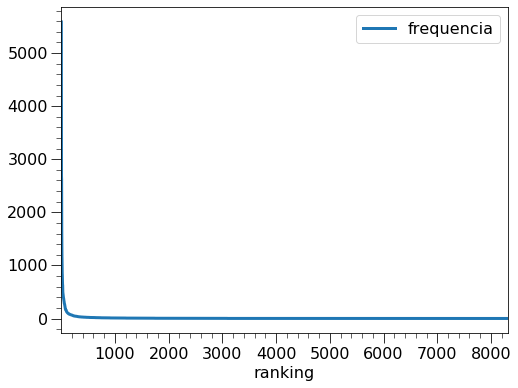

In [258]:
df_palavras_frequencia.plot(
    x='ranking',
    y='frequencia'
)

<p class="justified">
    Essa visualização não nos ajudou muito em verificar se os dados empíricos seguem de fato a lei de Zipf. Uma forma de apreciar melhor o comportamento é se colocarmos esses resultados em um gŕafico log-log. Já que a lei de Zipf é uma lei de potência, nessa escala teremos uma reta com inclinação aproximadamente $-1$:
</p>

$$
\begin{split}
    f(r) &= \frac{f(1)}{r} \\
    f(r) &= f(1)r^{-1} \\
    \log f(r) &= \log f(1) -\log r.
\end{split}
$$

<p class="justified">
    Portanto, nossos dados nessa escala fornecem a seguinte curva:
</p>

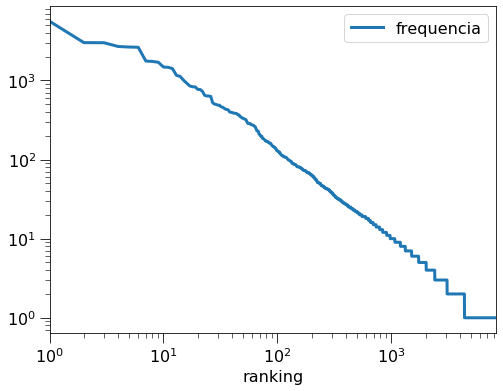

In [264]:
df_palavras_frequencia.plot(
    x='ranking',
    y='frequencia'
)

plt.yscale('log')
plt.xscale('log')

<p class="justified">
    Para ajustar os dados então, definimos uma função:
</p>

In [275]:
def model_frequency(r, f1):
    return f1/r

<p class="justified">
    e usamos a função <mark class="mono_gray">curve_fit()</mark> do pacote <mark class="mono_gray">scipy.optmize</mark>:
</p>    

In [277]:
params, _ = curve_fit(model_frequency, *np.asarray(df_palavras_frequencia[['ranking', 'frequencia']].T))
params

array([7267.27975076])

<p class="justified">
    O ajuste nos fornece o parâmetro $\hat{f}(1) = 7.267{,}28$. O <mark class="mono_gray"><b>^</b></mark> é para dizer que a variável é do modelo ajustado. Plotando o ajuste juntamente com os dados:
</p>

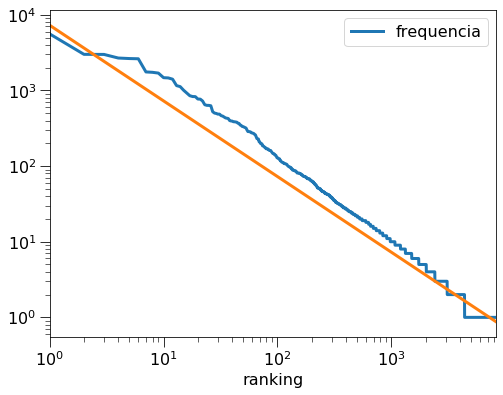

In [260]:
df_palavras_frequencia.plot(
    x='ranking',
    y='frequencia'
)

_r = df_palavras_frequencia['ranking']

plt.plot(
    _r,
    model_frequency(_r, *params)
)

plt.yscale('log')
plt.xscale('log')

<p class="justified">
    Observe que a curva sai bastante dos dados, porém a inclinação parece ser similar. Uma outra forma de tentar realizar esse ajuste é fazendo um ajuste linear ao invés de usarmos uma potência. Para isso, temos que transformar nossos dados aplicando o logaritmo nos <i>rankings</i> e nas frequências. Vamos criar duas novas colunas então, para esses valores transformados:
</p>

In [279]:
df_palavras_frequencia['ranking_log']    = df_palavras_frequencia['ranking'].apply(np.log)
df_palavras_frequencia['frequencia_log'] = df_palavras_frequencia['frequencia'].apply(np.log)
df_palavras_frequencia.head()

palavras  frequencia  ranking  ranking_log  frequencia_log
0      the        5585        1     0.000000        8.627840
1      and        2999        2     0.693147        8.006034
2        i        2991        3     1.098612        8.003363
3       to        2681        4     1.386294        7.893945
4       of        2639        5     1.609438        7.878155

<p class="justified">
    Veja que agora, se confeccionarmos um gráfico de $\log f \times \log r$, temos uma reta também:
</p>

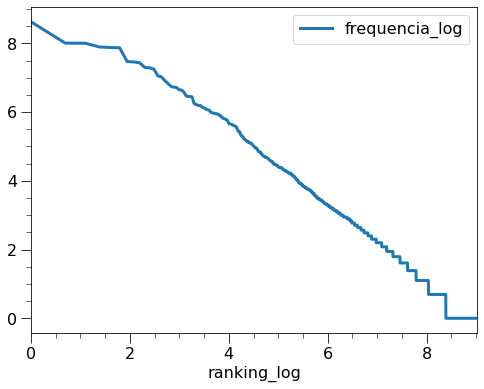

In [280]:
df_palavras_frequencia.plot(
    x='ranking_log',
    y='frequencia_log'
)

<p class="justified">
    Podemos então usar esses dados, que se assemelham a uma reta decrescente, para fazer um ajuste linear. Nesse cenário, estamos ajustando uma expressão do tipo
</p>


$$
    f(r) = \frac{\beta}{r^\alpha}
$$

<p class="justified">
    de maneira que
</p>

$$
    \log f(r) = \log \beta - \alpha \log r.
$$

<p class="justified">
    Assim, temos uma reta com coeficientes linear $\log \beta$ e angular $-\alpha$. Para obter esses coeficientes dos nossos dados transformados, podemos usar a função <mark class="mono_gray">polyfit()</mark> do pacote <mark class="mono_gray">numpy</mark>:
</p>

In [281]:
params_log = np.polyfit(*np.asarray(df_palavras_frequencia[['ranking_log', 'frequencia_log']].T), deg=1)
params_log

array([-1.18792221, 10.44146436])

In [283]:
np.exp(10.44)

34200.6524378894

<p class="justified">
    O ajuste nos fornece $\log \beta = 10{,}44$, ou $\beta = 34.200{,}65$ e $\alpha = 1{,}19$. Observe que o valor de $\alpha$ é próximo de $1$, como mencionado na lei de Zipf. Podemos comparar esse novo ajuste com os nossos dados via gráfico:
</p>

In [284]:
def reta(x, a, b):
    return a*x + b

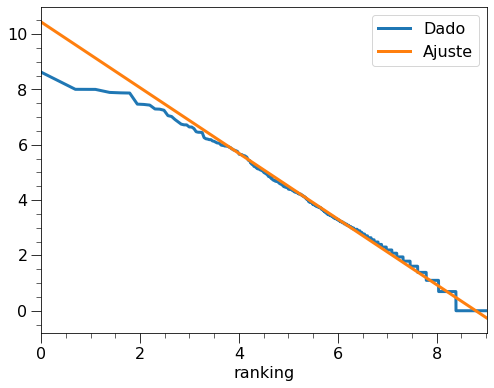

In [285]:
df_palavras_frequencia[['ranking', 'frequencia']].apply(np.log).plot(
    x='ranking',
    y='frequencia'
)

_r_log = df_palavras_frequencia['ranking'].apply(np.log)

plt.plot(
    _r_log,
    reta(_r_log, *params_log)
)

plt.legend(['Dado', 'Ajuste'])

<p class="justified">
    Esse ajuste, apesar de não ser tão satisfatório no começo, fornece algo mais agradável no restante da curva. Se analisarmos a quantidade de dados referente a esse intervalo no começo da distribuição, vemos que a quantidade é muito pequena:
</p>

In [296]:
num_dados_menor_2 = df_palavras_frequencia[df_palavras_frequencia['ranking_log'] <= 2].shape[0]
num_dados_menor_4 = df_palavras_frequencia[df_palavras_frequencia['ranking_log'] <= 4].shape[0]
num_total_de_dados = df_palavras_frequencia.shape[0]

print(f"""
    Porcentagem de dados com ranking_log < 2: {100*round(num_dados_menor_2/num_total_de_dados, 3)} %
    Porcentagem de dados com ranking_log < 4: {100*round(num_dados_menor_4/num_total_de_dados, 3)} %
""")


    Porcentagem de dados com ranking_log < 2: 0.1 %
    Porcentagem de dados com ranking_log < 4: 0.6 %



<p class="justified">
    Sem tanto rigor, vemos que a curva ajusta melhor uma porção de $99{,}4\%$ dos dados. Nosso objetivo é verificar que esse tipo de comportamento aparece em textos dos mais diversos. Assim, para fazer a mesma análise nos outros livros, vamos criar uma função que nos fornece diretamente o <mark class="mono_gray">pd.DataFrame()</mark> com os dados que precisaremos.
</p>

In [406]:
def zipf_law(path_file):
    """
    
    """
    # cria a lista de palavras a partir do texto limpo
    lista_de_palavras = limpando_texto(path_file).split()
    
    # cria o dicionário de palavras e suas frequencias
    dict_de_palavras = Counter(lista_de_palavras)
    
    # cria a lista com entradas [palavra, frequencia]
    lista_palavras_frequencia = [[palavra, frequencia] for palavra, frequencia in dict_de_palavras.items()]
    
    # cria o pd.DataFrame com as colunas ['palavras', 'frequencia']
    df_palavras_frequencia = pd.DataFrame(lista_palavras_frequencia, columns=['palavras', 'frequencia'])
    
    # ordena as frequencias em ordem decrescente
    df_palavras_frequencia.sort_values('frequencia', ascending=False, inplace=True)
    
    # resetamos o índice
    df_palavras_frequencia.reset_index(drop=True, inplace=True)

    # usamos o índice para criar a coluna dos rankings
    df_palavras_frequencia['ranking'] = df_palavras_frequencia.reset_index()['index'] + 1
    
    # variáveis em log
    df_palavras_frequencia['ranking_log']    = df_palavras_frequencia['ranking'].apply(np.log)
    df_palavras_frequencia['frequencia_log'] = df_palavras_frequencia['frequencia'].apply(np.log)
    
    df_palavras_frequencia['ranking_log_norm'] = df_palavras_frequencia['ranking_log']/df_palavras_frequencia['ranking_log'].max()
    df_palavras_frequencia['frequencia_norm'] = df_palavras_frequencia['frequencia']/df_palavras_frequencia['frequencia'].max()
    df_palavras_frequencia['frequencia_log_norm'] = df_palavras_frequencia['frequencia_log']/df_palavras_frequencia['frequencia_log'].max()
    
    return df_palavras_frequencia

In [403]:
zipf_law('../dados/livros/sherlock_holmes.txt')

palavras  frequencia  ranking  ranking_log  frequencia_log  \
0            the        5585        1     0.000000        8.627840   
1            and        2999        2     0.693147        8.006034   
2              i        2991        3     1.098612        8.003363   
3             to        2681        4     1.386294        7.893945   
4             of        2639        5     1.609438        7.878155   
...          ...         ...      ...          ...             ...   
8307      gummed           1     8308     9.024974        0.000000   
8308     chewing           1     8309     9.025095        0.000000   
8309     lighten           1     8310     9.025215        0.000000   
8310  accountant           1     8311     9.025335        0.000000   
8311     walsall           1     8312     9.025456        0.000000   

      frequencia_norm  frequencia_log_norm  
0            1.000000             1.000000  
1            0.536974             0.927930  
2            0.535542             0.927621  
3            0.480036             0.914939  
4            0.472516             0.913109  
...               ...                  ...  
8307         0.000179             0.000000  
8308         0.000179             0.000000  
8309         0.000179             0.000000  
8310         0.000179             0.000000  
8311         0.000179             0.000000  

[8312 rows x 7 columns]

In [404]:
zipf_law('../dados/livros/alices_adventures_in_wonderland.txt')

palavras  frequencia  ranking  ranking_log  frequencia_log  \
0             the        1628        1     0.000000        7.395108   
1             and         844        2     0.693147        6.738152   
2              to         721        3     1.098612        6.580639   
3               a         626        4     1.386294        6.439350   
4             she         537        5     1.609438        6.285998   
...           ...         ...      ...          ...             ...   
2745      tougher           1     2746     7.917901        0.000000   
2746       couple           1     2747     7.918265        0.000000   
2747     shilling           1     2748     7.918629        0.000000   
2748  ointmentone           1     2749     7.918992        0.000000   
2749        happy           1     2750     7.919356        0.000000   

      frequencia_norm  frequencia_log_norm  
0            1.000000             1.000000  
1            0.518428             0.911164  
2            0.442875             0.889864  
3            0.384521             0.870758  
4            0.329853             0.850021  
...               ...                  ...  
2745         0.000614             0.000000  
2746         0.000614             0.000000  
2747         0.000614             0.000000  
2748         0.000614             0.000000  
2749         0.000614             0.000000  

[2750 rows x 7 columns]

<p class="justified">
    Agora vamos confeccionar as curvas de $\log f \times \log r$ para todos os livros:
</p>

In [318]:
caminhos_dos_livros = glob.glob('../dados/livros/*')
f"Número de livros: {len(caminhos_dos_livros)}"

'Número de livros: 12'

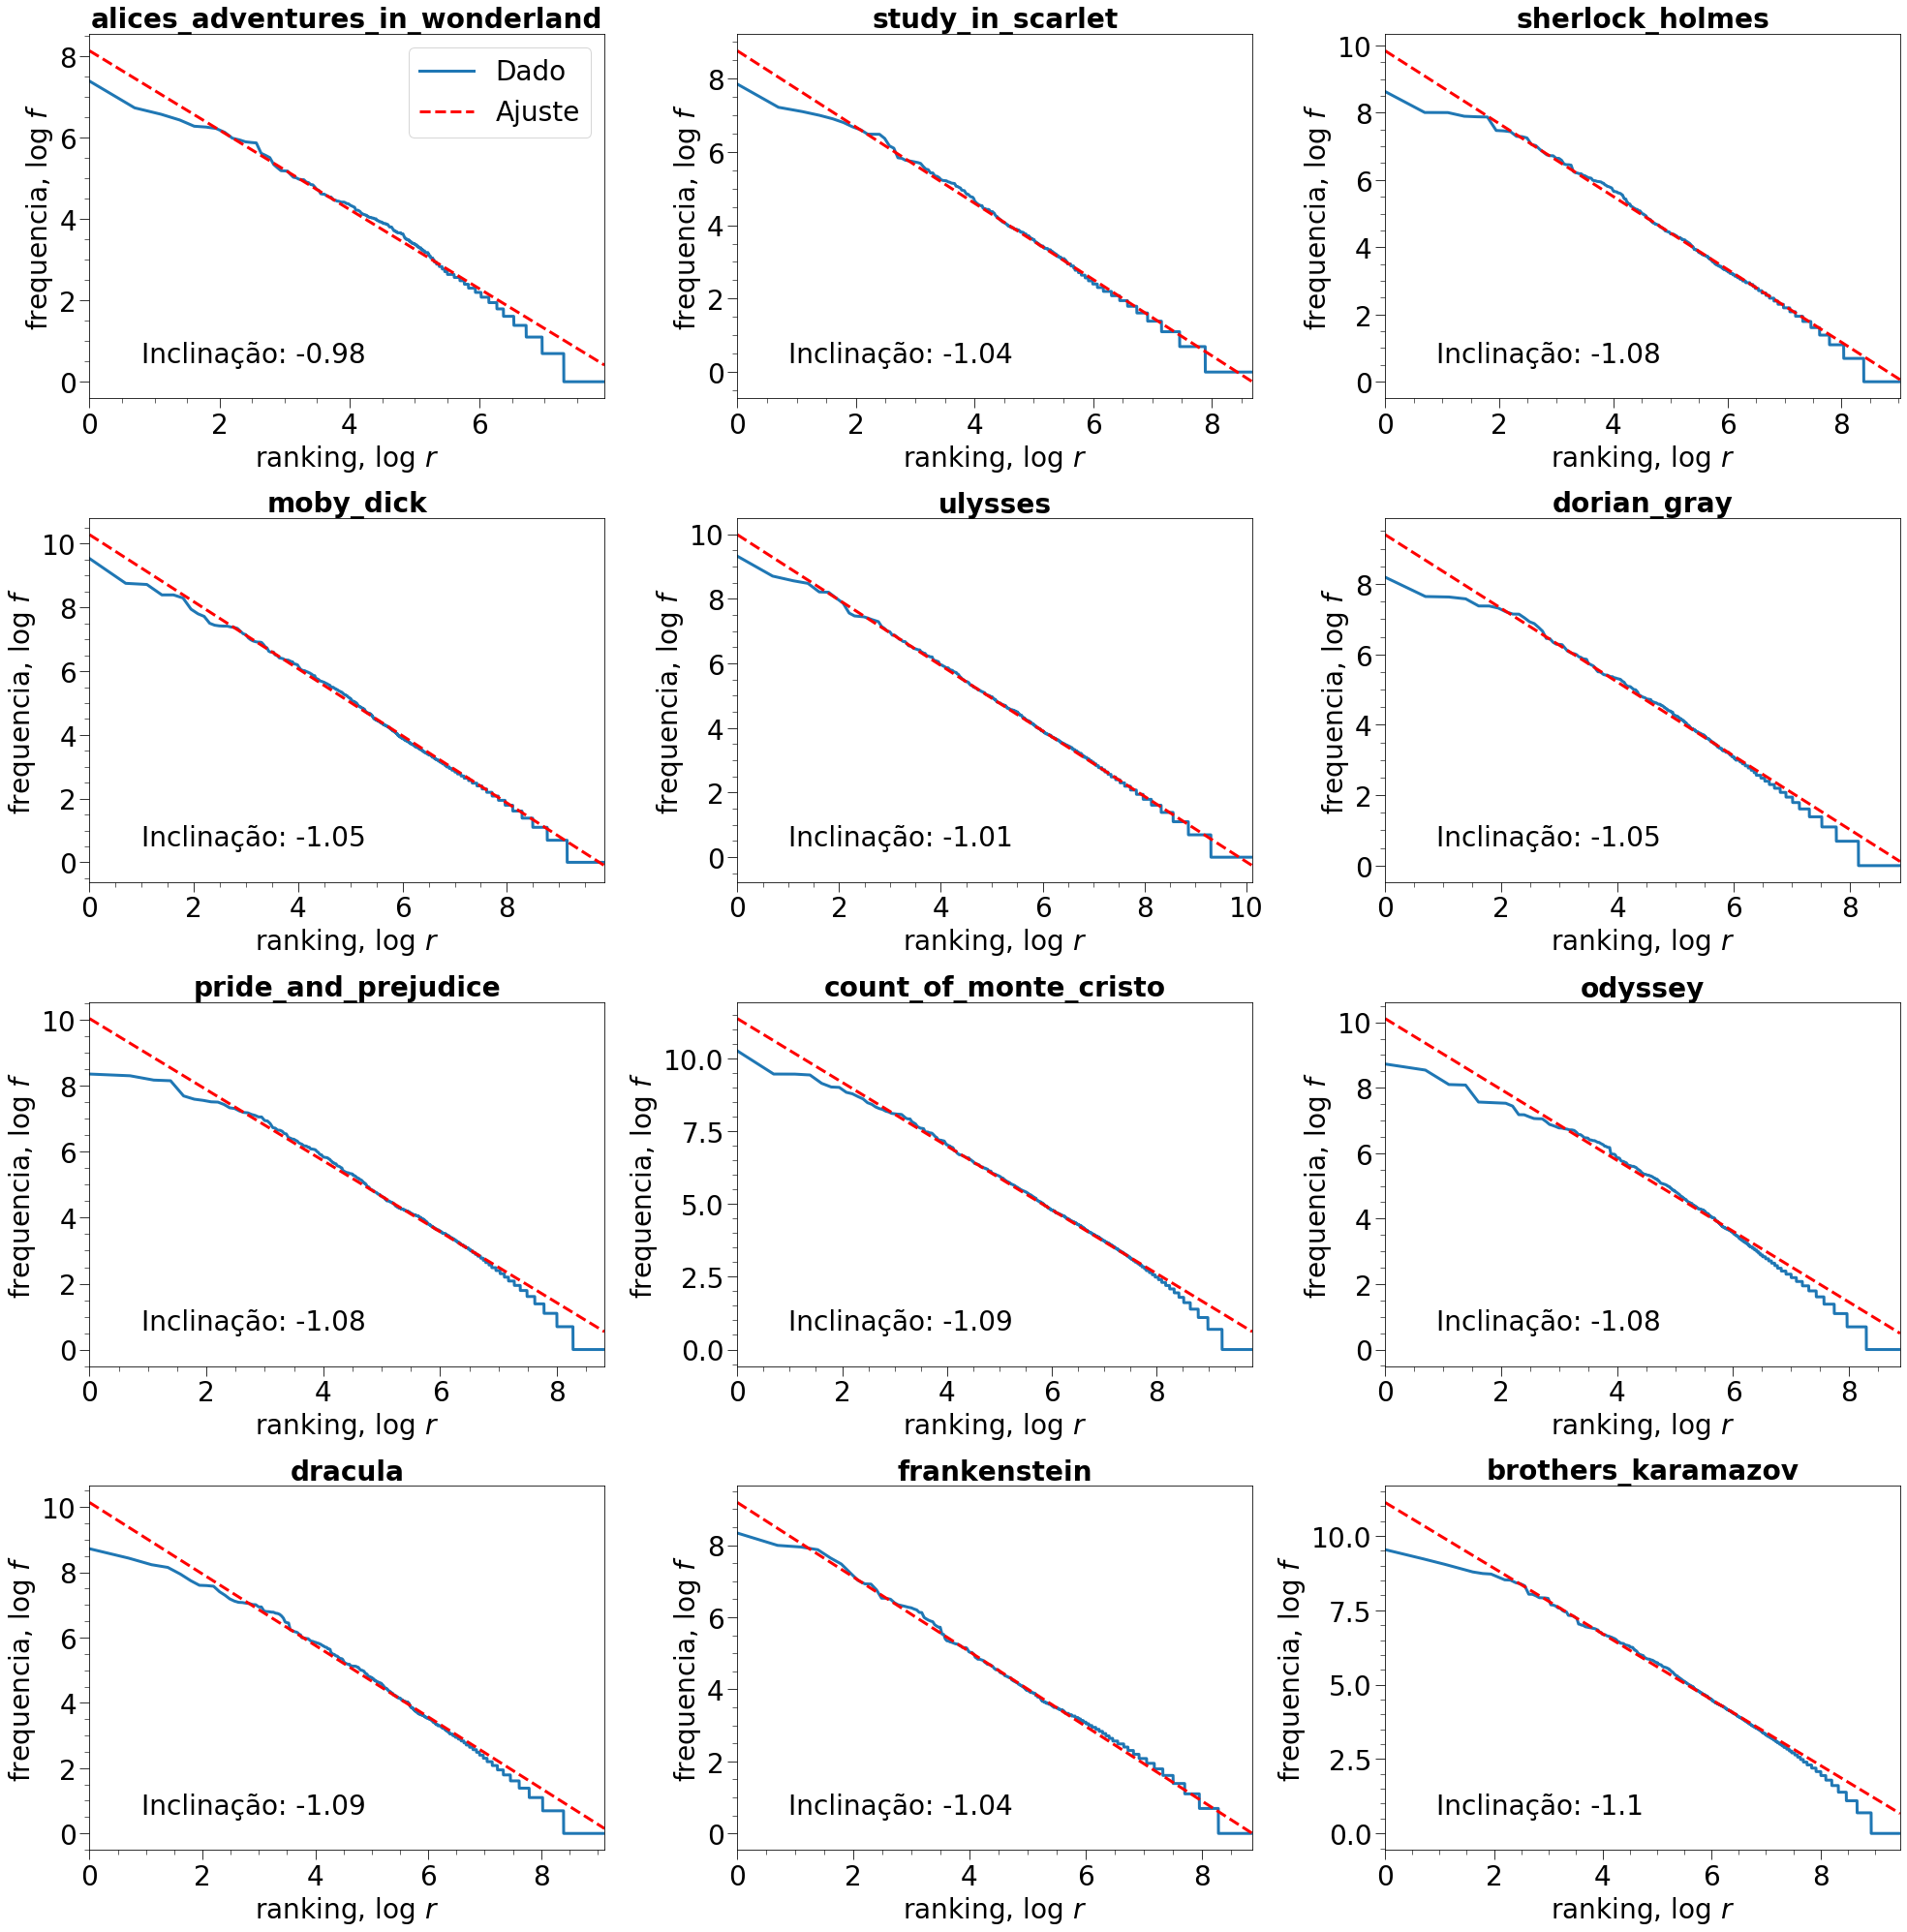

In [423]:
fig, axarr = plt.subplots(nrows=4, ncols=3, figsize=(28, 28))

FONT_SIZE = 28

for counter, ax in enumerate(fig.get_axes()):
    
    livro = caminhos_dos_livros[counter]
    nome_do_livro = livro.split('/')[-1].split('.')[0]
    
    dados = zipf_law(livro)
    dados_unique = dados.drop_duplicates('frequencia')#[dados['frequencia'] > 8]
    
    dados.plot(
        x='ranking_log',
        y='frequencia_log',
        ax=ax,
        legend=False
    )
        
    params = np.polyfit(*np.asarray(dados_unique[['ranking_log', 'frequencia_log']].T), deg=1)
    
    ax.plot(
        dados['ranking_log'],
        reta(dados['ranking_log'], *params),
        color="#ff0000",
        ls="--"
    )
    
    ax.set_xlabel('ranking, $\log\ r$', fontsize=FONT_SIZE)
    ax.set_ylabel('frequencia, $\log\ f$', fontsize=FONT_SIZE)
    
    ax.set_title(nome_do_livro, weight='bold', fontsize=FONT_SIZE)
    
    ax.annotate(f"Inclinação: {round(params[0], 2)}", xy=(0.1, 0.1), xycoords='axes fraction', fontsize=FONT_SIZE)
    
    ax.tick_params(labelsize=FONT_SIZE)
    
    if not counter:
        ax.legend(['Dado', 'Ajuste'], loc='upper right', fontsize=FONT_SIZE)
    
fig.tight_layout()

<p class="justified">
    Observamos que todos os livros apresentam um comportamento muito próximo da expressão da lei de Zipf. Podemos apreciar melhor esse comportamento global se normalizarmos as variáveis e confeccionarmos as curvas de todos os livros em um único gráfico:
</p>

Text(0, 0.5, 'frequencia, $\\log\\ f$')

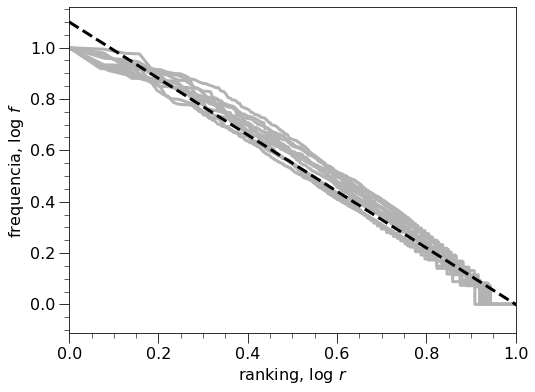

In [424]:
fig, axarr = plt.subplots()

for livro in caminhos_dos_livros:
    
    dados = zipf_law(livro)
    
    dados.plot(
        x='ranking_log_norm',
        y='frequencia_log_norm',
        ax=axarr,
        legend=False,
        color="#b3b3b3"
    )
    

axarr.plot(
    np.arange(0,1.1,0.05),
    1.1 - 1.1*np.arange(0,1.1,0.05),
    '--k'
)

axarr.set_xlabel('ranking, $\log\ r$')
axarr.set_ylabel('frequencia, $\log\ f$')

<p class="justified">
    Esse comportamento não é observado somente em livros literários. Observe na figura a seguir que o mesmo tipo de comportamento é encontrado para os textos das dissertações e teses dos alunos do PFI.
</p>

<figure align="center">
    <img class="aw" src="../figures/zipf.png" alt="Gutenberg Project main page.">
    <figcaption><b>Fig. 2</b> Distribuição das frequências nas dissertações e teses dos alunos do PFI.</figcaption>
</figure>

<a href="#sumario">Sumário</a>

---
<a id="lei-de-heaps"></a>
# Lei de Heaps

<p class="justified">
    Em 1978, Heaps observou que para textos de um único tópico, o tamanho do vocabulário exibe um crescimento sublinear com o tamanho do corpo textual. Em outras palavras,  ele observsou que o tamanho $V$ do vocabulário (número de palavras diferentes) de um texto cresce côncavamente com o tamanho $N$ (número total de palavras) do texto. Quando se mede $V$ para várias amostras $N$ de tamanho do texto, é possível observar que essa relação segue uma lei de potência:
</p>

$$
    \label{eq:heaps}
    V = kN^{\lambda},
$$

<p class="justified">
    com $k > 0$ e $0 > \lambda > 1$.
</p>

<p class="justified">
    O mesmo fenômeno também é conhecido como lei de Herdan (1964). Essa lei pode ser derivada a partir da Eq.~\eqref{eq:heaps}, assumindo que se $N=1$, de modo que $V=1$, implicando em $k = 1$, tem-se

$$
    \label{eq:herdan}
	V = N^{\lambda}.
$$

A partir da Eq.~\eqref{eq:herdan}, fica claro que

$$
    \label{herdan_ln}
	\lambda = \frac{\ln V}{\ln N}.
$$

 
Essa equação representa a formulação da lei de Herdan: O logaritmo do tamanho do vocabulário $V$ dividido pelo logaritmo do tamanho total do texto $N$ é igual a uma constante. Em geral, refere-se a esse fenômeno usando a lei de Heaps. Independente da formulação que se usa, o crescimento do vocabulário é sempre sublinear, isto é, $\alpha < 1$, pois não é possível que existam mais palavras únicas do que palavras dentro do texto.

A lei de Heaps, assim como a lei de Zipf, pode ser facilmente obtida pelo método <i>bag of words</i>.
</p>

In [426]:
limpando_texto('../dados/livros/sherlock_holmes.txt')

'the adventures of sherlock holmes to sherlock holmes she is always the woman i have seldom heard him mention her under any other name in his eyes she eclipses and predominates the whole of her sex it was not that he felt any emotion akin to love for irene adler all emotions and that one particularly were abhorrent to his cold precise but admirably balanced mind he was i take it the most perfect reasoning and observing machine that the world has seen but as a lover he would have placed himself in a false position he never spoke of the softer passions save with a gibe and a sneer they were admirable things for the observerexcellent for drawing the veil from mens motives and actions but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results grit in a sensitive instrument or a crack in one of his own highpower lenses would not be more disturbing than

<p class="justified">
    Esse comportamento não é observado somente em livros literários. Observe na figura a seguir que o mesmo tipo de comportamento é encontrado para os textos das dissertações e teses dos alunos do PFI.
</p>

<figure align="center">
    <img class="aw" src="../figures/heaps.png" alt="Lei de Heaps.">
    <figcaption><b>Fig. 3</b> Distribuição das frequências nas dissertações e teses dos alunos do PFI.</figcaption>
</figure>

<a href="#sumario">Sumário</a>

---
<a id="referencias"></a>
# Referências

<p class="justified">
    
</p>

<ol class="ref">
    <li class="ref" id="ref-1"><a href="https://www.gutenberg.org/">Gutenberg Project (acessado em 06/08/2020)</a></li>
    <li class="ref" id="ref-2"><a href="">Altman, E. G. & Gerlach, M.  <em>Statistical laws in linguistics</em>. arXiv:1502.03296 [physics] (2016).</a></li>
    <li class="ref" id="ref-3"><a href="">Kim, D., Son, S.-W. & Jeong, H. <em>Large-Scale Quantitative Analysis of PaintingArts</em>. Scientific Reports <b>4</b>, 7370 (2014)</a></li>
    <li class="ref" id="ref-4"><a href="">Torre, I. G., Luque, B., Lacasa, L., Luque, J. & Hernández-Fernández, A. <em>Emergence of linguistic laws in human voice</em>. Scientific Reports <b>7</b>, 43862 (2017)</a></li>
    <li class="ref" id="ref-5"><a href="">Newman, M. E. J. Power laws, <em>Pareto distributions and Zipf’s law</em>. Contemporary Physics <b>46</b>, 323–351 (2005).</a></li>
    <li class="ref" id="ref-6"><a href="">Stanley, M. H. R.et al. <em>Zipf plots and the size distribution of firms</em>. Economics Letters <b>49</b>, 453–457 (1995)</a></li>
    <li class="ref" id="ref-7"><a href="">Mantegna, R. N.et al. <em>Systematic analysis of coding and non coding DNA sequences using methods of statistical linguistics</em>. Physical Review <b>E52</b>, 2939–2950 (1995)</a></li>
    <li class="ref" id="ref-8"><a href="">Ausloos, M. <em>Equilibrium and dynamic methods when comparing an English text and its Esperanto translation</em>. Physica A: Statistical Mechanics and its Applications <b>387</b>, 6411–6420 (2008)</a></li>
</ol>